In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
import os
os.chdir('downloads')

In [3]:
os.getcwd()

'C:\\Users\\petri\\downloads'

In [4]:
spi = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv', skiprows=4)
meta = pd.read_csv('Metadata_Country_API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv')
gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv', skiprows=4)

In [5]:
spi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [6]:
meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [7]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869,NaN


In [8]:
# Remove columns
spi=spi[['Country Code', '2019']]
gdp=gdp[['Country Code', '2019']]
meta=meta[['Country Code', 'Region']]

In [9]:
# Check for null (missing) values
len(spi), len (spi.dropna())

(266, 264)

In [10]:
len(gdp), len (gdp.dropna())

(266, 247)

In [11]:
# Drop rows
spi=spi.dropna()
gdp=gdp.dropna()

In [12]:
spi.head()

,Country Code,2019
0,ABW,106310.0
1,AFE,660046272.0
2,AFG,38041757.0
3,AFW,446911598.0
4,AGO,31825299.0


In [13]:
gdp.head()

,Country Code,2019
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088
5,ALB,5355.847795


In [14]:
# Rename columns
spi=spi.rename(columns={'2019': 'SPI'})
gdp=gdp.rename(columns={'2019': 'GDP per capacita'})

In [15]:
spi.head()

,Country Code,SPI
0,ABW,106310.0
1,AFE,660046272.0
2,AFG,38041757.0
3,AFW,446911598.0
4,AGO,31825299.0


In [16]:
gdp.head()

,Country Code,GDP per capacita
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088
5,ALB,5355.847795


In [17]:
# Merge data
dataset=spi.merge(gdp, how='inner', on='Country Code')
dataset=dataset.merge(meta, how='inner', on='Country Code')

In [18]:
dataset.head()

,Country Code,SPI,GDP per capacita,Region
0,AFE,660046272.0,1485.307425,NaN
1,AFG,38041757.0,507.103392,South Asia
2,AFW,446911598.0,1772.339155,NaN
3,AGO,31825299.0,2809.626088,Sub-Saharan Africa
4,ALB,2854191.0,5355.847795,Europe & Central Asia


<AxesSubplot:xlabel='Region'>

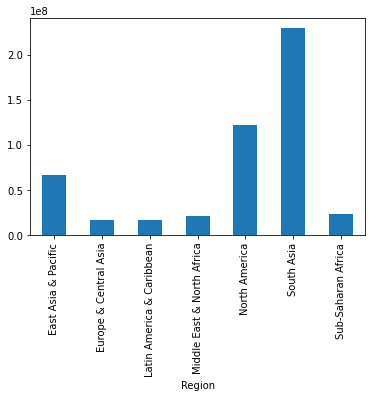

In [21]:
# Visualize
dataset.groupby('Region').mean()['SPI'].plot.bar()

<AxesSubplot:xlabel='GDP per capacita', ylabel='SPI'>

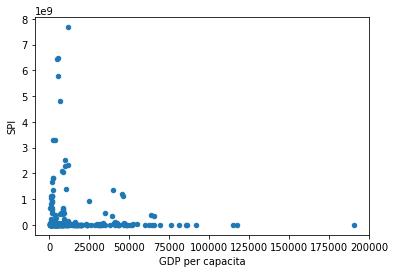

In [22]:
dataset.plot.scatter(x='GDP per capacita', y= 'SPI')

<AxesSubplot:ylabel='Region'>

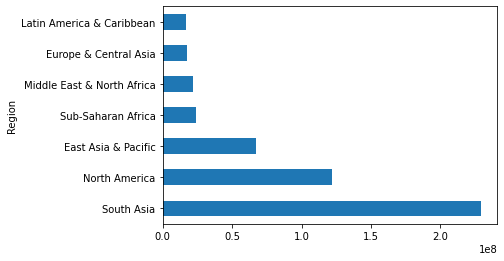

In [26]:
dataset.groupby('Region').mean()['SPI'].sort_values(ascending=False).plot.barh()

<AxesSubplot:xlabel='GDP per capacita', ylabel='SPI'>

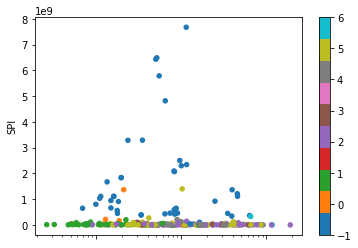

In [28]:
colors=dataset['Region'].factorize()[0]
dataset.plot.scatter(x='GDP per capacita', y='SPI', c=colors, logx=True, cmap='tab10', xlabel='GDP per capacita')